In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("C:/Users/dario/OneDrive/Escritorio/Unab/Inferencia y Patrones/Comisión 2 Florencia Statti/TP2/inferencia_estadistica_tp2/data/planets.csv")
df.head()

,mass,period,eccen
0,0.120,4.950,0.00
1,0.197,3.971,0.00
2,0.210,44.280,0.34
3,0.220,75.800,0.28
4,0.230,6.403,0.08


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mass    101 non-null    float64
 1   period  101 non-null    float64
 2   eccen   101 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


# a) Cuando las variables estan en escalas muy diferentes, se necesitara usar alguna forma de estandarizacion. Realizar un grafico tridimensional usando las observaciones escaladas.

In [5]:
ss = StandardScaler()
df_standard = pd.DataFrame(ss.fit_transform(df), columns=df.columns)

In [10]:
kmeans = KMeans(n_clusters=4, init = "random", n_init=10, random_state=i)
kmeans.fit(df_standard)
centroides=kmeans.cluster_centers_
etiquetas=kmeans.labels_
print(f"El valor mínimo de la función objetivo es: {kmeans.inertia_}")


El valor mínimo de la función objetivo es: 110.64289088429769


In [11]:
fig = px.scatter_3d(df_standard, x='mass', y='period', z='eccen', color=etiquetas,)
fig.update_layout(title='Visualización 3D de los exoplanetas estandarizados')
fig.show()

# b) Aplicar, a los datos escalados, el comando kmeans usando 4 centroides (de manera aleatoria) y obtener el valor mınimo de la funcion objetivo. Inspeccionar visualmente los agrupamientos generados.

In [12]:
fig = px.scatter_3d(df_standard, x='mass', y='period', z='eccen',color=etiquetas,title='Visualización 3D de los exoplanetas estandarizados')
fig.add_trace(go.Scatter3d(
    x=centroides[:, 0],
    y=centroides[:, 1],
    z=centroides[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', symbol='diamond'),
    name='Centroides'
))
fig.show()

c) Repetir el ıtem anterior varias veces y comparar.

In [142]:
seed = range(5)
centroides_rep = []
etiquetas_rep = []
for i in seed:
    kmeans = KMeans(n_clusters=4, init = "random", n_init=10, random_state=i)
    kmeans.fit(df_standard)
    centroides_rep.append(kmeans.cluster_centers_)
    etiquetas_rep.append(kmeans.labels_)
    print(f"Para la semilla n°{i+1}, el valor mínimo de la función objetivo es: {kmeans.inertia_:.4f}")
    print("********"*9)

Para la semilla n°1, el valor mínimo de la función objetivo es: 111.0958
************************************************************************
Para la semilla n°2, el valor mínimo de la función objetivo es: 110.6429
************************************************************************
Para la semilla n°3, el valor mínimo de la función objetivo es: 110.6429
************************************************************************
Para la semilla n°4, el valor mínimo de la función objetivo es: 110.5926
************************************************************************
Para la semilla n°5, el valor mínimo de la función objetivo es: 110.6429
************************************************************************


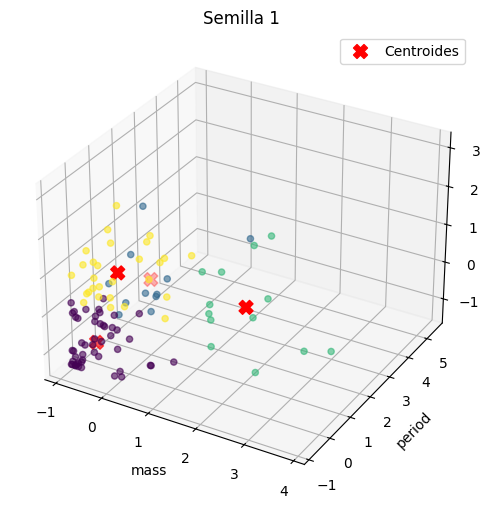

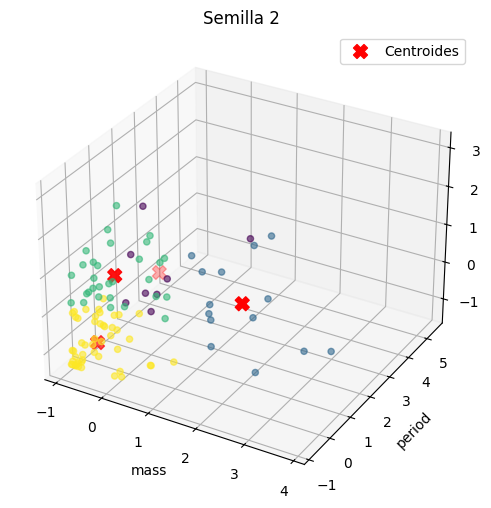

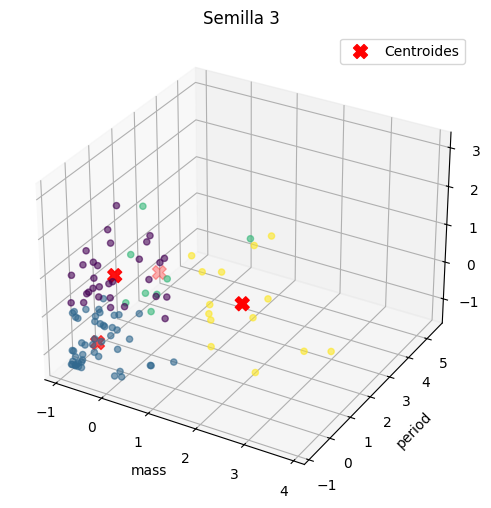

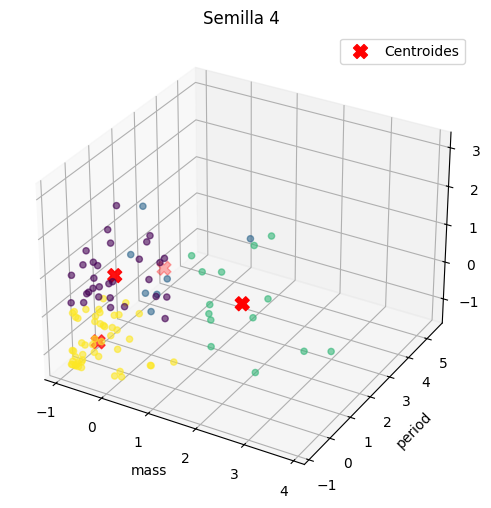

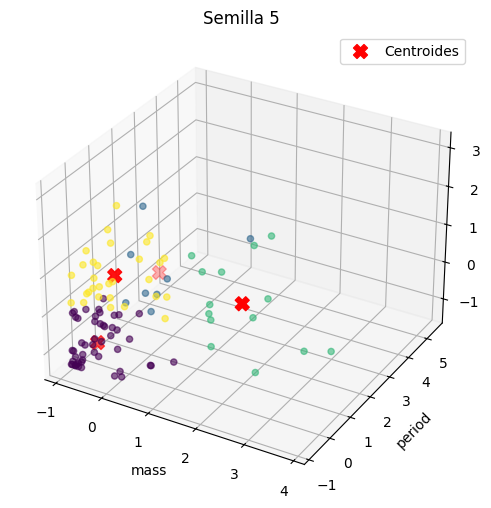

In [13]:
for idx, i in enumerate(seed):
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(df_standard.iloc[:,0], df_standard.iloc[:,1], df_standard.iloc[:,2],
               c=etiquetas_rep[idx], cmap='viridis', alpha=0.6)
    
    ax.scatter(centroides_rep[idx][:,0], centroides_rep[idx][:,1], centroides_rep[idx][:,2],
               c='red', marker='X', s=100, label='Centroides')
    
    ax.set_title(f'Semilla {i+1}')
    ax.set_xlabel(df_standard.columns[0])
    ax.set_ylabel(df_standard.columns[1])
    ax.set_zlabel(df_standard.columns[2])
    ax.legend()
    plt.show()

# d) Ejecutar el metodo K-medias eligiendo los centroides a partir de algun criterio.

In [123]:
k_values = range(2, 11)

resultados = {"k":[], "random": [], "k-means++": [], "propios": []}


for k in k_values:
    # Método random
    km_random = KMeans(n_clusters=k, init="random", n_init=10, random_state=42)
    km_random.fit(df_standard)
    resultados["random"].append(np.trunc(km_random.inertia_ * 10000) / 10000)
    
    # Método k-means++
    km_plus = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    km_plus.fit(df_standard)
    resultados["k-means++"].append(np.trunc(km_plus.inertia_ * 10000) / 10000)
    
    # Método con centroides propios (ejemplo: muestreo de k filas)
    seleccion_centroides = df_standard.sample(n=k, random_state=42).values
    km_propios = KMeans(n_clusters=k, init=seleccion_centroides, n_init=1, random_state=42)
    km_propios.fit(df_standard)
    resultados["propios"].append(np.trunc(km_propios.inertia_ * 10000) / 10000)

    resultados["k"].append(k)

tabla = pd.DataFrame(resultados)
tabla


,k,random,k-means++,propios
0,2,194.5926,194.5926,194.8677
1,3,145.0143,145.0143,153.6178
2,4,110.6061,110.3791,110.9990
3,5,92.0129,92.0129,93.2931
4,6,78.3570,79.8050,85.2916
5,7,64.9096,64.5318,77.7017
6,8,57.9971,57.6412,68.4012
7,9,52.4065,51.9740,65.4419
8,10,48.5936,46.1846,60.9000


# f ) Utilizar el metodo del codo para identificar la cantidad de clusters en cada uno de los metodos. ¿Cuantos grupos le sugiere?

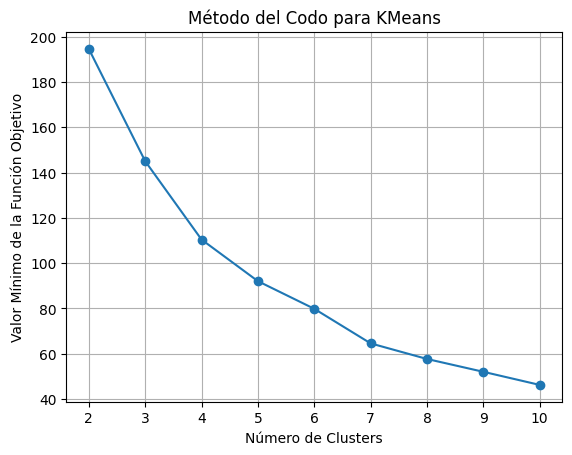

In [124]:
#Seleccionamos para analizar el método k_means++

plt.plot(k_values, resultados["k-means++"], marker='o')
plt.grid(True)
plt.title("Método del Codo para KMeans")
plt.xticks(k_values)
plt.xlabel("Número de Clusters")
plt.ylabel("Valor Mínimo de la Función Objetivo")
plt.show()

 # g) Utilizar el metodo Silhouette para identificar la cantidad de clusters en cada uno de los metodos. ¿Cuantos grupos le sugiere?

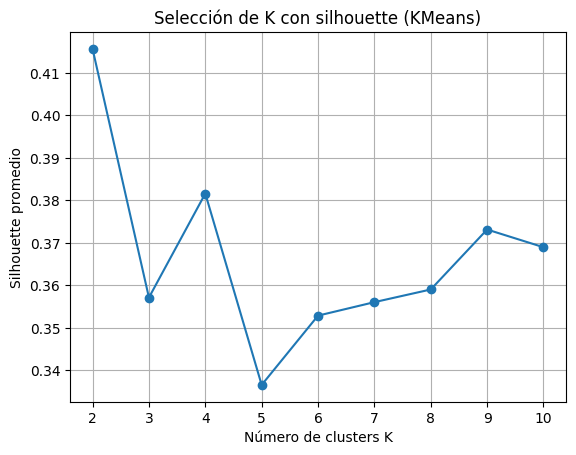

In [125]:
silh_score = []

for k in range(2,11):
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    etiqueta_sil = kmeans.fit_predict(df_standard)
    score = silhouette_score(df_standard, etiqueta_sil)
    silh_score.append(score)

plt.plot(range(2, 11), silh_score, marker='o')
plt.xlabel("Número de clusters K")
plt.ylabel("Silhouette promedio")
plt.title("Selección de K con silhouette (KMeans)")
plt.grid(True)
plt.show()

 
 ## h) Concluir

Con k=2 se obtendra una separación clara sin tener en cuenta posibles subgrupos.

Trabajando con k=4 se mejora la estructura interna de separación, además no sobreajustamos demasiado el modelo.

Por último, k=9 como es de esperarse, a mayor cantidad de grupos, mejora el índice del modelo. Sin embargo, se debe hilar muy fino por los riesgos de sobra ajuste.

El valor mínimo de la función objetivo es: 194.5926886632576


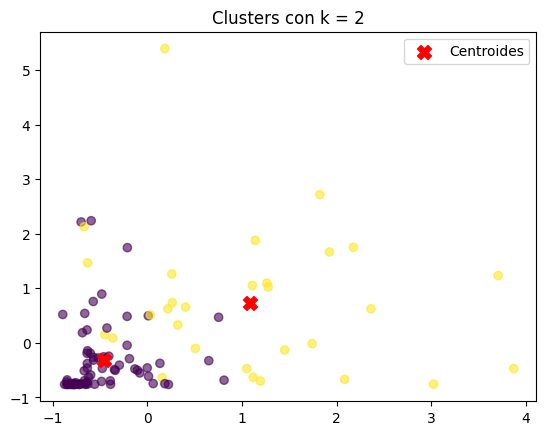

In [132]:
kmeans_2 = KMeans(n_clusters=2, init = "k-means++", n_init=10, random_state=42)
kmeans_2.fit(df_standard)
centroides_2=kmeans_2.cluster_centers_
etiquetas_2=kmeans_2.labels_
print(f"El valor mínimo de la función objetivo es: {kmeans_2.inertia_}")

plt.figure()
plt.scatter(df_standard['mass'], df_standard['period'], c=etiquetas_2, cmap='viridis', alpha=0.6)
plt.scatter(centroides_2[:, 0], centroides_2[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.title("Clusters con k = 2") 
plt.legend()  
plt.show()

In [143]:
fig = px.scatter_3d(df_standard, x='mass', y='period', z='eccen',color=etiquetas_2,title='Visualización 3D con k=2')
fig.add_trace(go.Scatter3d(
    x=centroides_2[:, 0],
    y=centroides_2[:, 1],
    z=centroides_2[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', symbol='diamond'),
    name='Centroides'
))
fig.show()

El valor mínimo de la función objetivo es: 110.37911612699116


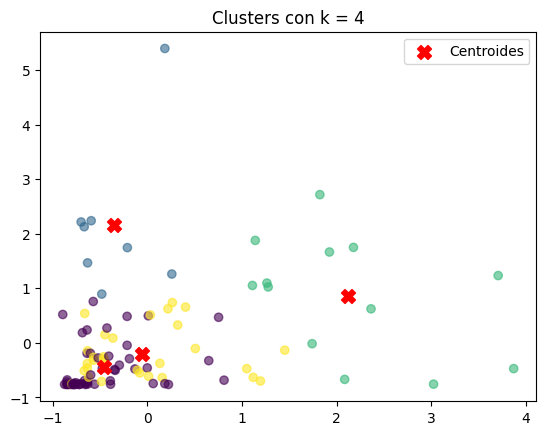

In [131]:
kmeans_4 = KMeans(n_clusters=4, init = "k-means++", n_init=10, random_state=42)
kmeans_4.fit(df_standard)
centroides_4=kmeans_4.cluster_centers_
etiquetas_4=kmeans_4.labels_
print(f"El valor mínimo de la función objetivo es: {kmeans_4.inertia_}")

plt.figure()
plt.scatter(df_standard['mass'], df_standard['period'], c=etiquetas_4, cmap='viridis', alpha=0.6)
plt.scatter(centroides_4[:, 0], centroides_4[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.title("Clusters con k = 4")   
plt.legend()
plt.show()

In [144]:
fig = px.scatter_3d(df_standard, x='mass', y='period', z='eccen',
                    color=etiquetas_4,title='Visualización 3D con k=4')
fig.add_trace(go.Scatter3d(
    x=centroides_4[:, 0],
    y=centroides_4[:, 1],
    z=centroides_4[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', symbol='diamond'),
    name='Centroides'
))
fig.show()

El valor mínimo de la función objetivo es: 51.97408194508859


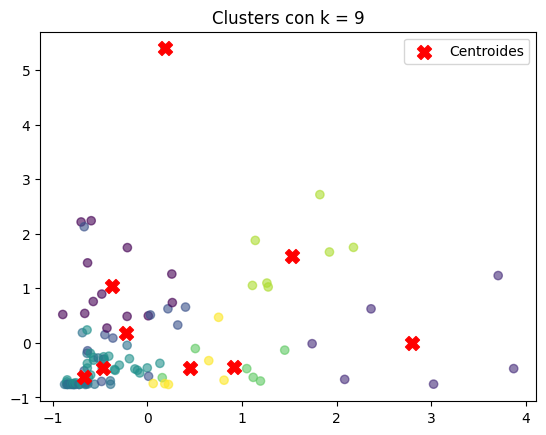

In [133]:
kmeans_9 = KMeans(n_clusters=9, init = "k-means++", n_init=10, random_state=42)
kmeans_9.fit(df_standard)
centroides_9=kmeans_9.cluster_centers_
etiquetas_9=kmeans_9.labels_
print(f"El valor mínimo de la función objetivo es: {kmeans_9.inertia_}")
plt.figure()
plt.scatter(df_standard['mass'], df_standard['period'], c=etiquetas_9, cmap='viridis', alpha=0.6)
plt.scatter(centroides_9[:, 0], centroides_9[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.title("Clusters con k = 9")
plt.legend()
plt.show()

In [145]:
fig = px.scatter_3d(df_standard, x='mass', y='period', z='eccen',color=etiquetas_9,title='Visualización 3D con k=9')
fig.add_trace(go.Scatter3d(
    x=centroides_9[:, 0],
    y=centroides_9[:, 1],
    z=centroides_9[:, 2],
    mode='markers',
    marker=dict(size=8, color='red', symbol='diamond'),
    name='Centroides'
))
fig.show()